In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

###### Question 1
- Apply histogram equalization on a histogram equalized image. In other words, apply histogram equalization twice on an image. Is there any difference between the first and second output image? You are free to use any image.
- `Result` there is no change if apply histogram equalization twice

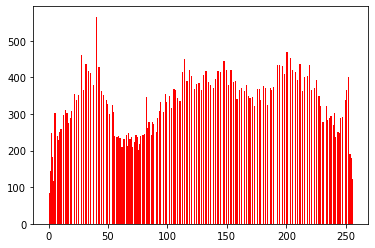

In [2]:
img = cv.imread('low_contrast_img.jfif', 0) #grayscale

eq = cv.equalizeHist(img)

plt.hist(eq.ravel(), 256, [0, 256], color = 'r')
plt.show()

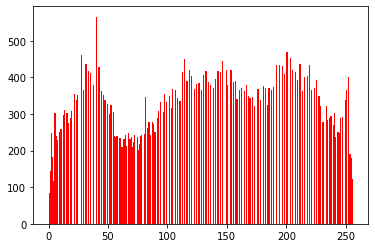

In [3]:
eq2 = cv.equalizeHist(eq)

plt.hist(eq2.ravel(), 256, [0, 256], color = 'r')
plt.show()

###### Question 2
- Load the image 'electronic.jfif'. Then:
- A) Experiment with different kernel size. Which kernel size is the most appropriate? **3 is the most appropriate**
- B) Perform edge detection using Sobel operator (combined both x and y) `with` and `without` image smoothing (Gaussian blurring). Display the 2 images.
- C) Try Laplacian of Gaussian

###### Based on the exercise conducted from (A) - (C), which image processing pathway is optimal? Justify your answer.
- Edge detection with Sobel operator with Gaussian blur

In [4]:
img = cv.imread('electronic.jfif', 0)

# image smoothing
img_blur = cv.GaussianBlur(img, (3, 3), 0)

# edge detection without Gaussian blurring
sobel_x = cv.Sobel(img, cv.CV_64F, 1, 0, ksize = 3) 
sobel_y = cv.Sobel(img, cv.CV_64F, 0, 1, ksize = 3)

sobel_x_abs = cv.convertScaleAbs(sobel_x)
sobel_y_abs = cv.convertScaleAbs(sobel_y)

## cv.addWeighted combines 2 images together
grad_2 = cv.addWeighted(sobel_x_abs, 0.5, sobel_y_abs, 0.5, 0)

# edge detection with Gaussian blurring
sobel_xb = cv.Sobel(img_blur, cv.CV_64F, 1, 0, ksize = 3) 
sobel_yb = cv.Sobel(img_blur, cv.CV_64F, 0, 1, ksize = 3)

sobel_xb_abs = cv.convertScaleAbs(sobel_xb)
sobel_yb_abs = cv.convertScaleAbs(sobel_yb)

## cv.addWeighted combines 2 images together
grad = cv.addWeighted(sobel_xb_abs, 0.5, sobel_yb_abs, 0.5, 0)

cv.imshow('result without Gaussian blur', grad_2)
cv.imshow('result with Gaussian blur', grad)
cv.waitKey(0)

-1

In [5]:
img = cv.imread('electronic.jfif', 0)

img_blur = cv.GaussianBlur(img, (3, 3), 0)
laplacian = cv.Laplacian(img_blur, cv.CV_64F, ksize = 3)
laplacian_8u = cv.convertScaleAbs(laplacian)

cv.imshow('laplacian', laplacian_8u)
cv.waitKey(0)

-1

###### Question 3
- Experiment with different edge detectors: Sobel, Laplacian, Prewitt, Scharr derivatives and Canny operators (all with aperture size of 3) on image named 'pineapple.jfif'. Comment on the results.
- From the result, **Canny operator** get the best output.

In [6]:
img = cv.imread('pineapple.jfif', 0)
img_blur = cv.GaussianBlur(img, (3, 3), 0)

# sobel edge detector
sobel_x = cv.Sobel(img_blur, cv.CV_64F, 1, 0, ksize = 3) 
sobel_y = cv.Sobel(img_blur, cv.CV_64F, 0, 1, ksize = 3)
sobel_x_abs = cv.convertScaleAbs(sobel_x)
sobel_y_abs = cv.convertScaleAbs(sobel_y)
grad = cv.addWeighted(sobel_x_abs, 0.5, sobel_y_abs, 0.5, 0)

# laplacian edge detector
laplacian = cv.Laplacian(img_blur, cv.CV_64F, ksize = 3)
laplacian_8u = cv.convertScaleAbs(laplacian)

# prewitt
kernelx = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
kernely = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
img_prewittx = cv.filter2D(img_blur, -1, kernelx)
img_prewitty = cv.filter2D(img_blur, -1, kernely)
grad2 = cv.addWeighted(img_prewittx, 0.5, img_prewitty, 0.5, 0)

# scharr
scharr_X = cv.Scharr(img_blur, cv.CV_64F, 1, 0) 
scharr_X_abs = np.uint8(np.absolute(scharr_X)) 
scharr_Y = cv.Scharr(img_blur, cv.CV_64F, 0, 1) 
scharr_Y_abs = np.uint8(np.absolute(scharr_Y)) 
grad3 = cv.bitwise_or(scharr_Y_abs,scharr_X_abs) 

# canny
dst = cv.Canny(img_blur, 100, 250, apertureSize = 3)

# display
cv.imshow('sobel', grad)
cv.imshow('laplacian', laplacian_8u)
cv.imshow('prewitt', grad2)
cv.imshow('scharr', grad3)
cv.imshow('canny', dst)
cv.waitKey(0)

-1

###### Question 4
- Write a program to identify the white object (probably laptop) present in the image 'electronic.jfif'. Draw bounding boxes on the objects.

In [7]:
# color space segmentation
img = cv.imread('electronic.jfif')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img is not None

True

In [8]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

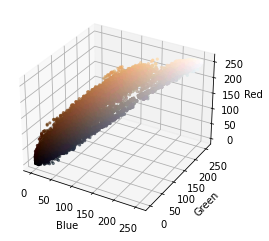

In [9]:
r, g, b = cv.split(img)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection = "3d")

pixel_colors = img.reshape((img.shape[0]*img.shape[1], 3))
norm = colors.Normalize(vmin = -1., vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(b.flatten(), g.flatten(), r.flatten(), facecolors = pixel_colors,
            marker = ".")
axis.set_xlabel('Blue')
axis.set_ylabel('Green')
axis.set_zlabel('Red')
plt.show()

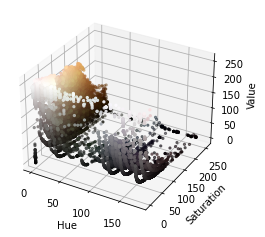

In [10]:
img_hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)

h, s, v = cv.split(img_hsv)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection = "3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors = pixel_colors,
            marker = ".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

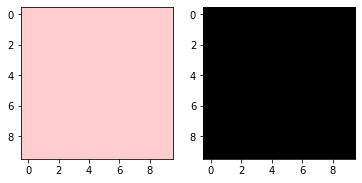

In [11]:
white_low = (60, 255, 0)
white_high = (0, 50, 255)

from matplotlib.colors import hsv_to_rgb

lo_square = np.full((10, 10, 3), white_low, dtype = np.uint8)/255.0
do_square = np.full((10, 10, 3), white_high, dtype = np.uint8)/255.0

plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(do_square))
plt.subplot(1,2,2)
plt.imshow(hsv_to_rgb(lo_square))
plt.show()

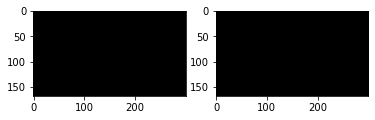

In [12]:
mask = cv.inRange(img_hsv, white_low, white_high)
res = cv.bitwise_and(img, img, mask = mask)

plt.subplot(1,2,1)
plt.imshow(mask, cmap = 'gray')
plt.subplot(1,2,2)
plt.imshow(res)
plt.show()

In [13]:
# draw bounding box
foreground_idx = cv.findNonZero(results)
foreground_idx_2D = foreground_idx.reshape(-1, 2)

coord_max = np.max(foreground_idx_2D, axis = 0)
coord_min = np.min(foreground_idx_2D, axis = 0)

cv.rectangle(image, (coord_min[0], coord_min[1]), (coord_max[0], coord_max[1]), (255, 0, 0), 2, cv.LINE_AA)
         
cv.imshow('bounding box', image)
cv.waitKey(0)
cv.destroyAllWindows()

NameError: name 'results' is not defined